# Model E + Epochs 100 + Batch 8

 Train : 894 Images

 Valid : 75 Images

In [2]:
!nvidia-smi

Fri Mar 21 05:39:37 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.94                 Driver Version: 560.94         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4080 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
|  0%   34C    P8             10W /  320W |     236MiB /  16376MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import torch

print("number of GPU: ", torch.cuda.device_count())
print("GPU Name: ", torch.cuda.get_device_name())

number of GPU:  1
GPU Name:  NVIDIA GeForce RTX 4080 SUPER


In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('using device : ', device)

using device :  cuda


In [4]:
torch.cuda.empty_cache()

In [5]:
import os
HOME = os.getcwd()
print(HOME)

c:\5025211148\YOLOv9-Segmentation


In [6]:
%pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


In [6]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.98  Python-3.12.4 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 4080 SUPER, 16376MiB)
Setup complete  (32 CPUs, 63.8 GB RAM, 230.0/476.5 GB disk)


In [7]:
from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
%pip install --user roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="R66BD6MEFMOCLYffXdn9")
project = rf.workspace("mcab").project("merge-inez")
version = project.version(1)
dataset = version.download("yolov9")
                

In [8]:
%cd {HOME}


c:\5025211148\YOLOv9-Segmentation


In [9]:
model = YOLO("yolov9e-seg.pt")

In [10]:
model.info()

YOLOv9e-seg summary: 1,261 layers, 60,512,800 parameters, 0 gradients, 248.4 GFLOPs


(1261, 60512800, 0, 248.4070912)

In [11]:
result = model.train(data="C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-1\\data.yaml", epochs=100, imgsz=640, batch=8)

New https://pypi.org/project/ultralytics/8.3.93 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.98  Python-3.12.4 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 4080 SUPER, 16376MiB)
engine\trainer: task=segment, mode=train, model=yolov9e-seg.pt, data=C:\5025211148\YOLOv9-Segmentation\merge-inez-1\data.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train13, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, re

train: Scanning C:\5025211148\YOLOv9-Segmentation\merge-inez-1\train\labels.cache... 894 images, 0 backgrounds, 0 corrupt: 100%|██████████| 894/894 [00:00<?, ?it/s]
val: Scanning C:\5025211148\YOLOv9-Segmentation\merge-inez-1\valid\labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]

val: WARNING  C:\5025211148\YOLOv9-Segmentation\merge-inez-1\valid\images\slice_234_jpg.rf.8c97c306d89d4aea1956db536d9ae8da.jpg: 1 duplicate labels removed


Plotting labels to runs\segment\train13\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 307 weight(decay=0.0), 323 weight(decay=0.0005), 322 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\segment\train13
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      12.2G       1.26      2.277      1.715      1.468         17        640: 100%|██████████| 112/112 [00:35<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.58it/s]

                   all         75        150     0.0022      0.167    0.00148   0.000268    0.00044     0.0333   0.000237   2.82e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      12.7G      1.226      1.999       1.07      1.441         23        640: 100%|██████████| 112/112 [00:32<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.90it/s]

                   all         75        150      0.087       0.06     0.0211    0.00638     0.0898     0.0667     0.0204    0.00581



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      12.6G      1.224       1.91     0.9696      1.441         19        640: 100%|██████████| 112/112 [00:31<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.94it/s]

                   all         75        150      0.344       0.16     0.0858     0.0247      0.109      0.207     0.0419     0.0119



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      12.8G       1.17      1.907     0.8974       1.41         15        640: 100%|██████████| 112/112 [00:31<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.99it/s]

                   all         75        150      0.624      0.293      0.291      0.129      0.534      0.267      0.187     0.0797



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      12.6G      1.087      1.724     0.7671      1.329         14        640: 100%|██████████| 112/112 [00:31<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.71it/s]

                   all         75        150      0.476      0.658      0.568      0.393      0.484      0.664      0.572       0.39



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      11.3G      1.056      1.711     0.7232      1.315         22        640: 100%|██████████| 112/112 [00:31<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.53it/s]

                   all         75        150       0.66      0.721      0.666      0.429      0.725      0.787      0.734      0.445



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      12.7G      1.034      1.669      0.698      1.299         17        640: 100%|██████████| 112/112 [00:31<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.81it/s]

                   all         75        150      0.528      0.707      0.628      0.428      0.489      0.727      0.601      0.418



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      11.3G      1.019       1.57     0.6459      1.286         23        640: 100%|██████████| 112/112 [00:31<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.94it/s]

                   all         75        150      0.579       0.33        0.3      0.163      0.543       0.28      0.263      0.118



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      11.4G     0.9733      1.571     0.6168      1.258         26        640: 100%|██████████| 112/112 [00:31<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.65it/s]

                   all         75        150      0.393      0.293      0.336      0.257        0.5      0.327      0.372      0.219



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      11.4G     0.9818       1.59     0.6191      1.262         19        640: 100%|██████████| 112/112 [00:31<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.81it/s]

                   all         75        150      0.723      0.713      0.678       0.45      0.753       0.74      0.723      0.442



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      12.5G     0.9448       1.54     0.5709      1.243         30        640: 100%|██████████| 112/112 [00:31<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.94it/s]

                   all         75        150      0.877      0.892      0.857      0.551      0.841      0.859      0.809      0.539



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      11.3G     0.9487      1.562     0.5827      1.251         23        640: 100%|██████████| 112/112 [00:31<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.94it/s]

                   all         75        150      0.632      0.667      0.602      0.459      0.628      0.653      0.596      0.426



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      12.5G     0.9191      1.496     0.5602      1.233         25        640: 100%|██████████| 112/112 [00:31<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.86it/s]

                   all         75        150      0.717       0.74      0.641      0.526      0.736       0.76      0.658      0.503



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      12.6G     0.9417      1.529     0.5643      1.229         24        640: 100%|██████████| 112/112 [00:31<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.92it/s]

                   all         75        150      0.702        0.7      0.656      0.486      0.734      0.727      0.683      0.482



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      11.3G      0.925      1.482     0.5365      1.234         27        640: 100%|██████████| 112/112 [00:31<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.86it/s]

                   all         75        150      0.762      0.753      0.664      0.532      0.748       0.74      0.646      0.499



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      12.5G     0.9211      1.504     0.5361      1.237         21        640: 100%|██████████| 112/112 [00:31<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.97it/s]

                   all         75        150      0.775      0.696       0.68      0.534      0.824      0.728       0.74      0.524



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      11.3G     0.8984      1.454     0.5274      1.222         28        640: 100%|██████████| 112/112 [00:31<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.91it/s]

                   all         75        150      0.656       0.74      0.649      0.531      0.656       0.74       0.65      0.495



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      11.3G     0.9119      1.476     0.5173      1.225         37        640: 100%|██████████| 112/112 [00:31<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.88it/s]

                   all         75        150      0.748      0.483      0.529      0.351      0.748      0.483      0.542      0.353



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      12.7G     0.9082      1.446     0.5092      1.208         26        640: 100%|██████████| 112/112 [00:31<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.82it/s]

                   all         75        150      0.746      0.733       0.65       0.51      0.797       0.78      0.699      0.508



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      11.3G     0.8898      1.446     0.5052      1.196         18        640: 100%|██████████| 112/112 [00:31<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.93it/s]

                   all         75        150      0.738      0.727      0.668      0.527       0.73      0.774       0.69      0.508



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      12.6G     0.9035      1.452      0.508      1.214         27        640: 100%|██████████| 112/112 [00:31<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.87it/s]

                   all         75        150      0.752      0.768      0.684      0.552       0.76      0.767      0.673       0.52



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      12.6G     0.8809      1.418     0.4931      1.196         26        640: 100%|██████████| 112/112 [00:31<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.89it/s]

                   all         75        150      0.727      0.744      0.662      0.539      0.778      0.759      0.699      0.521



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      12.6G     0.8662      1.384     0.4781      1.194         22        640: 100%|██████████| 112/112 [00:31<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.93it/s]

                   all         75        150      0.764      0.633      0.786      0.484      0.789      0.671      0.797      0.417



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      12.8G     0.8666      1.405     0.4668      1.192         19        640: 100%|██████████| 112/112 [00:31<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.93it/s]

                   all         75        150      0.859      0.813      0.802      0.542      0.901      0.874      0.865       0.55



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      11.3G     0.8896       1.45     0.4761      1.202         20        640: 100%|██████████| 112/112 [00:31<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.78it/s]

                   all         75        150      0.873      0.866       0.86       0.57        0.9      0.892      0.875       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      12.6G     0.8537      1.404     0.4607      1.182         24        640: 100%|██████████| 112/112 [00:31<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.94it/s]

                   all         75        150      0.826       0.79        0.8      0.564      0.836      0.793      0.798      0.549



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      11.3G     0.8709       1.39     0.4639      1.189         21        640: 100%|██████████| 112/112 [00:31<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.99it/s]

                   all         75        150       0.78      0.679      0.666      0.508      0.758      0.665      0.634      0.474



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      12.6G     0.8624      1.365     0.4616      1.195         23        640: 100%|██████████| 112/112 [00:31<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.93it/s]

                   all         75        150      0.787      0.787      0.754      0.555      0.783      0.787      0.744      0.519



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      12.6G     0.8636      1.403     0.4685      1.184         20        640: 100%|██████████| 112/112 [00:31<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.93it/s]

                   all         75        150      0.745      0.687      0.665      0.508      0.738       0.68      0.652      0.497



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      11.3G     0.8709      1.393     0.4686      1.185         19        640: 100%|██████████| 112/112 [00:31<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.88it/s]

                   all         75        150      0.735      0.679      0.647      0.499      0.761      0.698       0.66      0.508



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      12.6G     0.8438      1.356     0.4475      1.172         29        640: 100%|██████████| 112/112 [00:31<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.93it/s]

                   all         75        150      0.796      0.773      0.741      0.542      0.805      0.785      0.766      0.524



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      11.5G     0.8492      1.349     0.4505      1.172         14        640: 100%|██████████| 112/112 [00:31<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.88it/s]

                   all         75        150      0.747      0.712      0.668      0.536      0.777      0.736      0.692       0.51



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      11.3G     0.8349       1.35      0.442      1.168         28        640: 100%|██████████| 112/112 [00:31<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.81it/s]

                   all         75        150      0.806      0.733      0.708      0.554        0.8      0.793      0.739      0.532



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      12.6G     0.8271       1.33     0.4368      1.167         21        640: 100%|██████████| 112/112 [00:31<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.97it/s]

                   all         75        150      0.819       0.78      0.741      0.542      0.855      0.813       0.81      0.538



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      11.3G     0.8452       1.33     0.4363      1.158         17        640: 100%|██████████| 112/112 [00:31<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.94it/s]

                   all         75        150      0.803        0.8      0.744      0.572      0.857      0.853      0.809      0.555



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      12.8G     0.8317      1.339      0.438      1.167         22        640: 100%|██████████| 112/112 [00:31<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.65it/s]

                   all         75        150       0.87      0.878       0.82      0.562      0.935       0.94      0.936      0.572



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      12.5G     0.8078      1.302     0.4235      1.156         25        640: 100%|██████████| 112/112 [00:31<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.86it/s]

                   all         75        150      0.738      0.727      0.686      0.533      0.726      0.747      0.685      0.516



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      12.5G     0.8291      1.325     0.4309      1.163         15        640: 100%|██████████| 112/112 [00:31<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.97it/s]

                   all         75        150      0.916      0.907      0.893      0.588      0.951       0.94      0.928      0.582



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      12.5G     0.8311      1.335     0.4201      1.155         22        640: 100%|██████████| 112/112 [00:31<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.82it/s]

                   all         75        150      0.918      0.906      0.879      0.579      0.925      0.913      0.889      0.558



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      12.6G     0.8084      1.317     0.4149       1.15         29        640: 100%|██████████| 112/112 [00:31<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.85it/s]

                   all         75        150      0.726      0.707      0.663      0.526      0.794      0.767      0.727       0.51



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      11.3G     0.8202      1.331     0.4092      1.155         25        640: 100%|██████████| 112/112 [00:31<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.02it/s]

                   all         75        150      0.856      0.833      0.804      0.583      0.861      0.833      0.804      0.547



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      12.6G     0.8171      1.305     0.4092      1.155         21        640: 100%|██████████| 112/112 [00:31<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.94it/s]

                   all         75        150       0.76      0.767      0.702      0.558      0.813       0.82      0.745      0.548



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      12.6G     0.7931      1.285     0.3992      1.137         27        640: 100%|██████████| 112/112 [00:31<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.85it/s]

                   all         75        150      0.873      0.877      0.841      0.574        0.9      0.904      0.876      0.559



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      12.6G     0.8044      1.293     0.4001      1.149         20        640: 100%|██████████| 112/112 [00:31<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.82it/s]

                   all         75        150      0.735      0.697      0.658       0.52      0.771      0.724      0.694      0.505



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      12.6G     0.7749      1.255     0.3913      1.127         29        640: 100%|██████████| 112/112 [00:31<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.94it/s]

                   all         75        150      0.828       0.82      0.788      0.571      0.849       0.84      0.796      0.549



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      11.3G     0.7704      1.243     0.3883      1.131         30        640: 100%|██████████| 112/112 [00:31<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.79it/s]

                   all         75        150      0.865      0.873      0.851      0.594      0.838      0.847      0.816      0.571



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      12.6G     0.8084      1.283     0.4042      1.147         25        640: 100%|██████████| 112/112 [00:31<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.96it/s]

                   all         75        150      0.808       0.82       0.78      0.578      0.828       0.82      0.781      0.554



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      12.7G     0.7784      1.271     0.3854      1.124         22        640: 100%|██████████| 112/112 [00:31<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.74it/s]

                   all         75        150      0.851       0.86      0.818      0.573      0.857      0.867      0.824      0.554



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      11.4G     0.7893      1.262     0.3904      1.142         24        640: 100%|██████████| 112/112 [00:30<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.03it/s]

                   all         75        150      0.791      0.764      0.715      0.566      0.843      0.808      0.786      0.551



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      12.6G     0.7752      1.256     0.3898      1.128         20        640: 100%|██████████| 112/112 [00:30<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.11it/s]

                   all         75        150      0.845       0.84      0.794      0.564      0.866       0.86      0.804      0.552



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      12.5G     0.7796      1.258      0.382       1.13         13        640: 100%|██████████| 112/112 [00:31<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.95it/s]

                   all         75        150      0.828      0.837      0.779      0.573      0.857      0.852      0.799      0.563



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      12.6G     0.7717      1.255     0.3859      1.127         15        640: 100%|██████████| 112/112 [00:30<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.06it/s]

                   all         75        150      0.777      0.744      0.733      0.564      0.785       0.75      0.735      0.538



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      12.8G     0.7628      1.224     0.3739      1.112         19        640: 100%|██████████| 112/112 [00:31<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.95it/s]

                   all         75        150      0.809        0.8      0.774      0.578      0.851      0.846      0.816       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      11.3G     0.7457      1.219     0.3719      1.112         29        640: 100%|██████████| 112/112 [00:31<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.01it/s]

                   all         75        150      0.829      0.849       0.79       0.58      0.869      0.867      0.833      0.555



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      12.6G     0.7616       1.24     0.3765      1.117         28        640: 100%|██████████| 112/112 [00:30<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.95it/s]

                   all         75        150       0.83       0.84      0.799        0.6       0.87       0.86      0.841      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      12.6G     0.7734       1.24     0.3762       1.13         21        640: 100%|██████████| 112/112 [00:30<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.05it/s]

                   all         75        150      0.834      0.853      0.794      0.584      0.909      0.879      0.869      0.577



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      11.3G     0.7426      1.203     0.3643       1.11         29        640: 100%|██████████| 112/112 [00:31<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.92it/s]

                   all         75        150      0.816      0.833      0.766      0.576      0.807       0.82      0.752      0.545



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      11.3G     0.7379       1.18     0.3623      1.106         33        640: 100%|██████████| 112/112 [00:31<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.91it/s]

                   all         75        150      0.926      0.743      0.802       0.58      0.935      0.766      0.847      0.552



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      12.7G     0.7518      1.214     0.3614      1.109         17        640: 100%|██████████| 112/112 [00:31<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.08it/s]

                   all         75        150      0.857      0.855      0.852      0.615      0.903      0.885        0.9      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      12.6G     0.7365      1.201     0.3592      1.098         17        640: 100%|██████████| 112/112 [00:31<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.06it/s]

                   all         75        150      0.819       0.81      0.768      0.573      0.866      0.853      0.831      0.569



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      12.6G     0.7313       1.18      0.355      1.099         22        640: 100%|██████████| 112/112 [00:31<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.93it/s]

                   all         75        150      0.874      0.887      0.851      0.599      0.876      0.873      0.845      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      12.6G     0.7437      1.207     0.3655       1.11         14        640: 100%|██████████| 112/112 [00:31<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.85it/s]

                   all         75        150      0.916      0.887      0.902      0.619      0.935      0.893      0.914      0.599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      12.6G     0.7294      1.172     0.3571      1.096         22        640: 100%|██████████| 112/112 [00:31<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.97it/s]

                   all         75        150      0.822      0.833      0.791      0.597      0.891      0.863      0.865      0.582



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      12.8G     0.7271      1.175     0.3575      1.103         14        640: 100%|██████████| 112/112 [00:31<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.91it/s]

                   all         75        150      0.885      0.891      0.911      0.631       0.91        0.9      0.929      0.621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      12.6G      0.713      1.131     0.3524      1.084         30        640: 100%|██████████| 112/112 [00:30<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.03it/s]

                   all         75        150      0.855      0.863      0.834      0.593      0.855      0.863      0.841      0.574



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      12.8G     0.7298      1.176     0.3574       1.09         24        640: 100%|██████████| 112/112 [00:30<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.07it/s]

                   all         75        150      0.797      0.783       0.75      0.567      0.841      0.813      0.778      0.556



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      12.8G     0.7213      1.172     0.3484      1.092         24        640: 100%|██████████| 112/112 [00:31<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.00it/s]

                   all         75        150      0.809      0.773      0.733      0.563      0.862      0.813      0.779      0.545



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      12.6G     0.7049      1.144     0.3443      1.086         24        640: 100%|██████████| 112/112 [00:30<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.01it/s]

                   all         75        150      0.854      0.845      0.811      0.603       0.91      0.898      0.891      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      12.5G     0.7005      1.146     0.3453      1.074         28        640: 100%|██████████| 112/112 [00:31<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.81it/s]

                   all         75        150      0.875      0.864      0.836      0.598       0.92      0.893      0.908      0.583



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      12.6G     0.7045      1.146     0.3359      1.073         25        640: 100%|██████████| 112/112 [00:30<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.03it/s]

                   all         75        150      0.775       0.76      0.724      0.562       0.79      0.773      0.765      0.541



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      12.6G     0.6979       1.15     0.3464      1.081         16        640: 100%|██████████| 112/112 [00:31<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.03it/s]

                   all         75        150      0.747       0.77      0.681      0.562      0.783       0.78      0.723      0.532



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      12.8G     0.6873      1.118     0.3348      1.071         26        640: 100%|██████████| 112/112 [00:31<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.00it/s]

                   all         75        150      0.796       0.74      0.707      0.561      0.865      0.793      0.785      0.539



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      11.3G     0.6923      1.131     0.3348      1.066         19        640: 100%|██████████| 112/112 [00:30<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.01it/s]

                   all         75        150      0.902      0.914      0.912      0.611      0.928       0.92      0.915      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      12.6G     0.6973      1.131     0.3402      1.075         13        640: 100%|██████████| 112/112 [00:31<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.95it/s]

                   all         75        150      0.866       0.86      0.817      0.588      0.902      0.879      0.861      0.581



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      12.8G     0.6934      1.128     0.3314      1.066         28        640: 100%|██████████| 112/112 [00:30<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.04it/s]

                   all         75        150      0.871      0.846       0.86      0.619      0.928      0.894      0.933      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      12.6G     0.6821       1.12     0.3241      1.068         27        640: 100%|██████████| 112/112 [00:30<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.99it/s]

                   all         75        150      0.853      0.853      0.835      0.612      0.919      0.867       0.89      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      11.3G     0.6714      1.097     0.3193      1.062         26        640: 100%|██████████| 112/112 [00:30<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.99it/s]

                   all         75        150      0.821      0.793      0.756      0.583      0.875       0.84      0.848      0.568



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      11.3G     0.6731      1.078     0.3205      1.057         33        640: 100%|██████████| 112/112 [00:31<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.77it/s]

                   all         75        150      0.793      0.765       0.73      0.569      0.845      0.812      0.801      0.542



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      12.6G     0.6591      1.077     0.3197       1.06         19        640: 100%|██████████| 112/112 [00:30<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.79it/s]

                   all         75        150        0.8      0.807      0.735      0.578      0.853       0.86      0.815       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      12.6G     0.6615      1.067     0.3176      1.045         18        640: 100%|██████████| 112/112 [00:31<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.88it/s]

                   all         75        150      0.845      0.867      0.827      0.611      0.899        0.9      0.888        0.6



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      12.6G     0.6582      1.079     0.3189      1.062         20        640: 100%|██████████| 112/112 [00:31<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.10it/s]

                   all         75        150      0.858      0.872      0.827      0.616      0.917      0.893      0.896        0.6



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      11.3G     0.6609      1.063     0.3151       1.05         14        640: 100%|██████████| 112/112 [00:31<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.91it/s]

                   all         75        150      0.894      0.873      0.872      0.631      0.909      0.887      0.903       0.62



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      12.7G      0.661      1.087     0.3132      1.047         26        640: 100%|██████████| 112/112 [00:31<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.98it/s]

                   all         75        150      0.821      0.815      0.793       0.59      0.848       0.84      0.835      0.567



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      12.8G      0.654      1.067     0.3156      1.051         23        640: 100%|██████████| 112/112 [00:30<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.00it/s]

                   all         75        150      0.866      0.873      0.847      0.606      0.904      0.893      0.861      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      12.7G     0.6524      1.071     0.3109      1.052         16        640: 100%|██████████| 112/112 [00:31<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.80it/s]

                   all         75        150      0.839      0.833      0.802        0.6      0.848       0.84      0.811      0.574



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      12.5G     0.6444      1.074     0.3074      1.042         15        640: 100%|██████████| 112/112 [00:30<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.95it/s]

                   all         75        150      0.839      0.847      0.825      0.609       0.88      0.887      0.886      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      12.7G     0.6429      1.045     0.3084      1.039         16        640: 100%|██████████| 112/112 [00:30<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.96it/s]

                   all         75        150      0.792        0.8      0.737      0.575      0.863      0.853       0.83      0.558



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      12.6G     0.6251      1.034     0.2969      1.036         27        640: 100%|██████████| 112/112 [00:31<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.76it/s]

                   all         75        150       0.87      0.883      0.852      0.621        0.9      0.907      0.897      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      12.6G     0.6365      1.049     0.3056      1.044         21        640: 100%|██████████| 112/112 [00:31<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.02it/s]

                   all         75        150      0.868      0.873      0.861      0.615      0.909      0.913      0.911      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      11.3G     0.6241      1.022     0.3009      1.033         16        640: 100%|██████████| 112/112 [00:31<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.05it/s]

                   all         75        150      0.819       0.84      0.788      0.596      0.851      0.873      0.837      0.573


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      12.6G     0.6273      1.061     0.2844      1.046         12        640: 100%|██████████| 112/112 [00:31<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.08it/s]

                   all         75        150      0.815      0.824      0.773      0.591      0.855      0.863       0.83      0.565



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      12.6G      0.611      1.018     0.2834      1.025         12        640: 100%|██████████| 112/112 [00:31<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.84it/s]

                   all         75        150       0.86      0.865      0.859       0.61      0.876      0.869      0.871       0.59



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      11.3G     0.5959      1.019     0.2761      1.023         12        640: 100%|██████████| 112/112 [00:30<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.02it/s]

                   all         75        150      0.861      0.853      0.844      0.616      0.903      0.893      0.885      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      12.5G     0.5934       1.01     0.2726      1.024         12        640: 100%|██████████| 112/112 [00:30<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.00it/s]

                   all         75        150      0.836      0.833      0.801      0.608      0.863       0.86      0.835      0.581



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      12.6G     0.5841      1.002     0.2704       1.01         12        640: 100%|██████████| 112/112 [00:31<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.74it/s]

                   all         75        150       0.85      0.847      0.814      0.612      0.872      0.873      0.847      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      11.5G     0.5829     0.9832     0.2658      1.016         12        640: 100%|██████████| 112/112 [00:30<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.03it/s]

                   all         75        150       0.85      0.864      0.827      0.611      0.875      0.886      0.852      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      12.8G     0.5785      0.981      0.266      1.014         12        640: 100%|██████████| 112/112 [00:30<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.02it/s]

                   all         75        150      0.888      0.893      0.867      0.619      0.901      0.907      0.886      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      11.5G     0.5714     0.9857     0.2659      1.008         12        640: 100%|██████████| 112/112 [00:31<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.98it/s]

                   all         75        150      0.861      0.866      0.827      0.602      0.894       0.88      0.864      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      12.8G     0.5583     0.9771      0.259          1         12        640: 100%|██████████| 112/112 [00:31<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.97it/s]

                   all         75        150      0.866      0.873      0.837      0.616      0.894      0.893       0.87      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      12.6G     0.5617     0.9678     0.2586     0.9953         12        640: 100%|██████████| 112/112 [00:31<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.80it/s]

                   all         75        150      0.849       0.86      0.824      0.608      0.884      0.873      0.857      0.591



100 epochs completed in 0.965 hours.
Optimizer stripped from runs\segment\train13\weights\last.pt, 121.9MB
Optimizer stripped from runs\segment\train13\weights\best.pt, 121.9MB

Validating runs\segment\train13\weights\best.pt...
Ultralytics YOLOv8.2.98  Python-3.12.4 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 4080 SUPER, 16376MiB)
YOLOv9e-seg summary (fused): 714 layers, 59,683,222 parameters, 0 gradients, 244.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.89it/s]


                   all         75        150      0.883      0.895      0.911       0.63      0.908        0.9      0.929      0.621
                    ab         75         75      0.945          1      0.995      0.969      0.958          1      0.995       0.93
                    mc         75         75       0.82      0.789      0.827      0.291      0.858        0.8      0.863      0.312
Speed: 0.4ms preprocess, 10.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs\segment\train13



image 1/1 C:\5025211148\YOLOv9-Segmentation\merge-inez-1\valid\images\slice_2_png.rf.773ebb3973e8d24b3610d7d5889312bf.jpg: 640x640 1 ab, 1 mc, 16.8ms
Speed: 0.0ms preprocess, 16.8ms inference, 49.6ms postprocess per image at shape (1, 3, 640, 640)


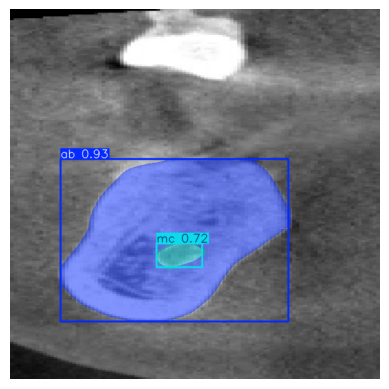

In [10]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from ultralytics import YOLO

model = YOLO("C:\\5025211148\\YOLOv9-Segmentation\\runs\\segment\\train13\\weights\\best.pt")  # load a custom model

# Predict with the model
results = model("C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-1\\valid\\images\\slice_2_png.rf.773ebb3973e8d24b3610d7d5889312bf.jpg")


predicted_img = results[0].plot()
output_dir = "C:\\5025211148\\YOLOv9-Segmentation\\runs\\segment\\predict"
os.makedirs(output_dir, exist_ok=True)

output_image_path = os.path.join(output_dir, "predicted.jpg")

cv2.imwrite(output_image_path, predicted_img)

predicted_img_rgb = cv2.cvtColor(predicted_img, cv2.COLOR_BGR2RGB)

plt.imshow(predicted_img_rgb)
plt.axis('off')  # Hilangkan sumbu
plt.show()

In [11]:
model_path = r'C:\\5025211148\\YOLOv9-Segmentation\\runs\\segment\\train13\\weights\\best.pt'
valid_path = r'C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-1\\valid\\images'
ground_truth_path = r'C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-1\\valid\\labels'
gt_AB_path = r"C:\\5025211148\\YOLOv9-Segmentation\\Dataset Train Val\\gt-AB"
gt_MC_path = r"C:\\5025211148\\YOLOv9-Segmentation\\Dataset Train Val\\gt-MC"

segmented_AB_path = fr'C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB'
segmented_AB_path_2 = r'C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB'
segmented_AB_npy = r'C:\\5025211148\\YOLOv9-Segmentation\\yolov9c-segmented_AB.npy'

segmented_MC_path = fr'C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC'
segmented_MC_path_2 = r'C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC'
segmented_MC_npy = r'C:\\5025211148\\YOLOv9-Segmentation\\yolov9c-segmented_MC.npy'

for path in [gt_AB_path, gt_MC_path, segmented_AB_path, segmented_MC_path]:
  os.makedirs(path, exist_ok=True)

In [12]:
import os
import re

# specify the directory path
directory_path = valid_path

# create an empty list to store the filenames with directory path
file_list = []

# iterate over the files in the directory
for filename in os.listdir(directory_path):
    # check if the item is a file
    if os.path.isfile(os.path.join(directory_path, filename)):
        # append the filename with directory path to the list
        file_list.append(os.path.join(directory_path, filename))

def extract_number(s):
    match = re.search(r'slice_(\d+)', s)  # Match 'slice_' followed by one or more digits
    return int(match.group(1)) if match else float('inf')

file_list = sorted(file_list, key=extract_number)
for filename in file_list:
    print(filename)
# print(file_list)  # Output: sorted file_list with filenames like 'slice_0', 'slice_1', 'slice_2', etc.


C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-1\\valid\\images\slice_0_png.rf.b6a308ad17de783c210d9ceb410d76a1.jpg
C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-1\\valid\\images\slice_1_png.rf.813ec633aebc1e939b902b040068a91a.jpg
C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-1\\valid\\images\slice_2_png.rf.773ebb3973e8d24b3610d7d5889312bf.jpg
C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-1\\valid\\images\slice_3_png.rf.2b7ac0dccdcc3241e2441dcdfe40b19a.jpg
C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-1\\valid\\images\slice_4_png.rf.ed9951865dd8c8e9c4bb357b12d90bf3.jpg
C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-1\\valid\\images\slice_5_png.rf.fa534a063f0865aba05bfb1f39bf17f1.jpg
C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-1\\valid\\images\slice_6_png.rf.69513226c67a48924c9727490a40871b.jpg
C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-1\\valid\\images\slice_7_png.rf.911a9c8ba0e64b11ffd5e11ceb31250e.jpg
C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-1\\valid\\images

In [13]:
from ultralytics import YOLO

# Load a model
model = YOLO(model_path, task='segment')  # load a pretrained model (recommended for training)

In [14]:
results = model(file_list, save=True)


0: 640x640 1 ab, 1 mc, 845.5ms
1: 640x640 1 ab, 1 mc, 845.5ms
2: 640x640 1 ab, 1 mc, 845.5ms
3: 640x640 1 ab, 1 mc, 845.5ms
4: 640x640 1 ab, 1 mc, 845.5ms
5: 640x640 1 ab, 1 mc, 845.5ms
6: 640x640 1 ab, 1 mc, 845.5ms
7: 640x640 1 ab, 1 mc, 845.5ms
8: 640x640 1 ab, 1 mc, 845.5ms
9: 640x640 1 ab, 1 mc, 845.5ms
10: 640x640 1 ab, 1 mc, 845.5ms
11: 640x640 1 ab, 1 mc, 845.5ms
12: 640x640 1 ab, 1 mc, 845.5ms
13: 640x640 1 ab, 1 mc, 845.5ms
14: 640x640 1 ab, 1 mc, 845.5ms
15: 640x640 1 ab, 1 mc, 845.5ms
16: 640x640 1 ab, 1 mc, 845.5ms
17: 640x640 1 ab, 845.5ms
18: 640x640 1 ab, 1 mc, 845.5ms
19: 640x640 1 ab, 1 mc, 845.5ms
20: 640x640 1 ab, 1 mc, 845.5ms
21: 640x640 1 ab, 1 mc, 845.5ms
22: 640x640 1 ab, 1 mc, 845.5ms
23: 640x640 1 ab, 1 mc, 845.5ms
24: 640x640 1 ab, 1 mc, 845.5ms
25: 640x640 1 ab, 1 mc, 845.5ms
26: 640x640 1 ab, 1 mc, 845.5ms
27: 640x640 1 ab, 1 mc, 845.5ms
28: 640x640 1 ab, 1 mc, 845.5ms
29: 640x640 1 ab, 1 mc, 845.5ms
30: 640x640 1 ab, 1 mc, 845.5ms
31: 640x640 1 ab, 1 mc,

In [15]:
print(len(results))

75


In [16]:
import torch
import cv2
import numpy as np
i = 0
x = 101
y = 200

for result in results:
  if(result.masks is not None):
    # get the AB masks
    boxes = result.boxes.data
    clss = boxes[:, 5]
    AB_indices = torch.where(clss == 0)
    AB_indices = (AB_indices[0][0].unsqueeze(0),)
    # AB_indices = AB_indices[0][0]
    print('class', clss)
    print('indices', AB_indices)
    # Convert mask to single channel image
    try:
      mask_raw = result.masks.cpu().data[[AB_indices]].numpy().transpose(1, 2, 0)
      # Convert single channel grayscale to 3 channel image
      mask_3channel = cv2.merge((mask_raw,mask_raw,mask_raw))

      # Get the size of the original image (height, width, channels)
      h2, w2, c2 = result.orig_img.shape

      # Resize the mask to the same size as the image (can probably be removed if image is the same size as the model)
      mask = cv2.resize(mask_3channel, (w2, h2))

      # Convert BGR to HSV
      hsv = cv2.cvtColor(mask, cv2.COLOR_BGR2HSV)

      # Define range of brightness in HSV
      lower_black = np.array([0,0,0])
      upper_black = np.array([0,0,1])

      # Create a mask. Threshold the HSV image to get everything black
      mask = cv2.inRange(mask, lower_black, upper_black)

      # Invert the mask to get everything but black
      mask = cv2.bitwise_not(mask)

      # Apply the mask to the original image
      masked = cv2.bitwise_and(result.orig_img, result.orig_img, mask=mask)

      # Show the masked part of the image
      # cv2.imshow("mask", masked)
      resized_mask = cv2.resize(mask, (101, 200))
      cv2.imwrite(fr'{segmented_AB_path}\\merged_segs_{i}.jpg', resized_mask)
      print(fr'{segmented_AB_path}\\merged_segs_{i}.jpg')
    except Exception as e:
      print('error',e)
      # print('\n')
      continue
  else:
    width = 101
    height = 200
    black_image = np.zeros((height, width), dtype=np.uint8)
    print('ada yang kosong lo..')
    # Save the black image to a file
    cv2.imwrite(fr'{segmented_AB_path}\\merged_segs_{i}.jpg', black_image)
    print(fr'{segmented_AB_path}\\merged_segs_{i}.jpg')
  print('\n')
  i = i+1

class tensor([0., 1.], device='cuda:0')
indices (tensor([0], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\\merged_segs_0.jpg


class tensor([0., 1.], device='cuda:0')
indices (tensor([0], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\\merged_segs_1.jpg


class tensor([0., 1.], device='cuda:0')
indices (tensor([0], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\\merged_segs_2.jpg


class tensor([0., 1.], device='cuda:0')
indices (tensor([0], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\\merged_segs_3.jpg


class tensor([0., 1.], device='cuda:0')
indices (tensor([0], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\\merged_segs_4.jpg


class tensor([0., 1.], device='cuda:0')
indices (tensor([0], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\\merged_segs_5.jpg


class tensor([0., 1.], device='cuda:0')
indices (tensor([0], device='cuda:0'),)
C:\\5025211148

In [17]:
import os
import re

# specify the directory path
directory_path = segmented_AB_path_2

# create an empty list to store the filenames with directory path
file_list_AB = []

# iterate over the files in the directory
for filename in os.listdir(directory_path):
    # check if the item is a file
    if os.path.isfile(os.path.join(directory_path, filename)):
        # append the filename with directory path to the list
        file_list_AB.append(os.path.join(directory_path, filename))

def extract_number(s):
    match = re.search(r'merged_segs_(\d+)', s)  # Match 'merged_segs_' followed by one or more digits
    return int(match.group(1)) if match else float('inf')

file_list_AB = sorted(file_list_AB, key=extract_number)
for filename in file_list_AB:
    print(filename)
# print(file_list)  # Output: sorted file_list with filenames like 'merged_segs_0', 'merged_segs_1', 'merged_segs_2', etc.


C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_0.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_1.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_2.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_3.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_4.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_5.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_6.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_7.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_8.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_9.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_10.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_11.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_12.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_13.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segment

In [18]:
import numpy as np
from PIL import Image  # If your images are in image files

# Assuming img_files is a list of file paths to the 2D images
# img_files = ['image1.png', 'image2.png', 'image3.png']  # Replace with your actual file paths

# Load the images and convert them to numpy arrays
image_arrays = [np.array(Image.open(img_file)) for img_file in file_list_AB]

# Stack the image arrays into a 3D numpy array
stacked_images = np.stack(image_arrays, axis=0)

# stacked_images is now a 3D numpy array where the first dimension represents the index of the image in the list

# Example usage:
print(stacked_images.shape)  # Output: (3, height, width, channels) assuming RGB images

np.save(segmented_AB_npy, stacked_images)

(75, 200, 101)


In [19]:
import torch
import cv2
i = 0
x = 101
y = 200

for result in results:
  if(result.masks is not None):
    # get the AB masks
    try:
      boxes = result.boxes.data
      clss = boxes[:, 5]
      AB_indices = torch.where(clss == 1)
      AB_indices = (AB_indices[0][0].unsqueeze(0),)
      # AB_indices = AB_indices[0][0]
      print('class', clss)
      print('indices', AB_indices)
      # Convert mask to single channel image
      mask_raw = result.masks.cpu().data[[AB_indices]].numpy().transpose(1, 2, 0)
      # Convert single channel grayscale to 3 channel image
      mask_3channel = cv2.merge((mask_raw,mask_raw,mask_raw))

      # Get the size of the original image (height, width, channels)
      h2, w2, c2 = result.orig_img.shape

      # Resize the mask to the same size as the image (can probably be removed if image is the same size as the model)
      mask = cv2.resize(mask_3channel, (w2, h2))

      # Convert BGR to HSV
      hsv = cv2.cvtColor(mask, cv2.COLOR_BGR2HSV)

      # Define range of brightness in HSV
      lower_black = np.array([0,0,0])
      upper_black = np.array([0,0,1])

      # Create a mask. Threshold the HSV image to get everything black
      mask = cv2.inRange(mask, lower_black, upper_black)

      # Invert the mask to get everything but black
      mask = cv2.bitwise_not(mask)

      # Apply the mask to the original image
      masked = cv2.bitwise_and(result.orig_img, result.orig_img, mask=mask)

      # Show the masked part of the image
      # cv2.imshow("mask", masked)
      resized_mask = cv2.resize(mask, (101, 200))
      cv2.imwrite(fr'{segmented_MC_path}\\merged_segs_{i}.jpg', resized_mask)
      print(fr'{segmented_MC_path}\\merged_segs_{i}.jpg')
      print('ketemu')
    except Exception as e:
      print('error',e)
      width = 101
      height = 200
      black_image = np.zeros((height, width), dtype=np.uint8)
      print('tidak ada mc lo..')
      # Save the black image to a file
      cv2.imwrite(fr'{segmented_MC_path}\\merged_segs_{i}.jpg', black_image)
      print(fr'{segmented_MC_path}\\merged_segs_{i}.jpg')
      i = i+1
      continue
  else:
    width = 101
    height = 200
    black_image = np.zeros((height, width), dtype=np.uint8)
    print('ada yang kosong lo..')
    # Save the black image to a file
    cv2.imwrite(fr'{segmented_MC_path}\\merged_segs_{i}.jpg', black_image)
    print(fr'{segmented_MC_path}\\merged_segs_{i}.jpg')
  print('\n')
  i = i+1

class tensor([0., 1.], device='cuda:0')
indices (tensor([1], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\\merged_segs_0.jpg
ketemu


class tensor([0., 1.], device='cuda:0')
indices (tensor([1], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\\merged_segs_1.jpg
ketemu


class tensor([0., 1.], device='cuda:0')
indices (tensor([1], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\\merged_segs_2.jpg
ketemu


class tensor([0., 1.], device='cuda:0')
indices (tensor([1], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\\merged_segs_3.jpg
ketemu


class tensor([0., 1.], device='cuda:0')
indices (tensor([1], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\\merged_segs_4.jpg
ketemu


class tensor([0., 1.], device='cuda:0')
indices (tensor([1], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\\merged_segs_5.jpg
ketemu


class tensor([0., 1.], device='cuda:0')
indices (ten

In [20]:
import os
import re

# specify the directory path
directory_path = segmented_MC_path_2

# create an empty list to store the filenames with directory path
file_list_MC = []

# iterate over the files in the directory
for filename in os.listdir(directory_path):
    # check if the item is a file
    if os.path.isfile(os.path.join(directory_path, filename)):
        # append the filename with directory path to the list
        file_list_MC.append(os.path.join(directory_path, filename))

def extract_number(s):
    match = re.search(r'merged_segs_(\d+)', s)  # Match 'merged_segs_' followed by one or more digits
    return int(match.group(1)) if match else float('inf')

file_list_MC = sorted(file_list_MC, key=extract_number)
for filename in file_list_MC:
    print(filename)
# print(file_list)  # Output: sorted file_list with filenames like 'merged_segs_0', 'merged_segs_1', 'merged_segs_2', etc.


C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_0.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_1.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_2.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_3.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_4.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_5.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_6.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_7.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_8.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_9.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_10.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_11.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_12.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_13.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segment

In [21]:
import numpy as np
from PIL import Image  # If your images are in image files

# Assuming img_files is a list of file paths to the 2D images
# img_files = ['image1.png', 'image2.png', 'image3.png']  # Replace with your actual file paths

# Load the images and convert them to numpy arrays
image_arrays = [np.array(Image.open(img_file)) for img_file in file_list_MC]

# Stack the image arrays into a 3D numpy array
stacked_images = np.stack(image_arrays, axis=0)

# stacked_images is now a 3D numpy array where the first dimension represents the index of the image in the list

# Example usage:
print(stacked_images.shape)  # Output: (3, height, width, channels) assuming RGB images

np.save(segmented_MC_npy, stacked_images)

(75, 200, 101)


In [22]:
import os
import cv2
import numpy as np

# Directory paths
img_path = valid_path
gt_path = ground_truth_path
output_path = gt_AB_path

# Ensure output directory exists
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Iterate over files in the image directory
for img_file in os.listdir(img_path):
    if img_file.endswith(".jpg") or img_file.endswith(".png"):  # adjust based on your image format
        # Read the image
        img = cv2.imread(os.path.join(img_path, img_file))

        # Create a blank white image with the same dimensions as the original image
        mask = np.ones_like(img) * 255

        # Read the corresponding ground truth file
        gt_file = os.path.splitext(img_file)[0] + ".txt"  # assuming ground truth files have the same name as images
        gt_file_path = os.path.join(gt_path, gt_file)

        if os.path.exists(gt_file_path):
            class_0_points = []
            class_1_points = []
            with open(gt_file_path, "r") as file:
                lines = file.readlines()
                for line in lines:
                    data = line.split()
                    class_label = int(data[0])
                    points = [(float(data[i]), float(data[i+1])) for i in range(1, len(data), 2)]
                    # Convert normalized coordinates to pixel coordinates
                    img_height, img_width, _ = img.shape
                    points = [(int(point[0] * img_width), int(point[1] * img_height)) for point in points]
                    if class_label == 0:
                        class_0_points.extend(points)
                    elif class_label == 1:
                        class_1_points.extend(points)

            # Create numpy arrays of points for drawing the polygons
            polygon_points_0 = np.array(class_0_points)
            polygon_points_1 = np.array(class_1_points)

            # Draw the filled polygons on the mask
            if len(polygon_points_0) > 0:
                cv2.fillPoly(mask, [polygon_points_0], color=(0, 0, 0))
            if len(polygon_points_1) > 0:
                cv2.fillPoly(mask, [polygon_points_1], color=(255, 255, 255))

            # Resize the output image to 101x200
            mask = 255 - mask
            mask_resized = cv2.resize(mask, (101, 200))

            # Save the output image as JPEG
            output_file = os.path.splitext(img_file)[0] + "_output.jpg"
            output_file_path = os.path.join(output_path, output_file)
            cv2.imwrite(output_file_path, mask_resized)

            print(f"Saved resized output image for {img_file} as {output_file_path}")
        else:
            print(f"No ground truth file found for {img_file}")

# image_loader = ImageLoader(output_path)
# gt_AB = image_loader.load_images()


Saved resized output image for slice_0_png.rf.b6a308ad17de783c210d9ceb410d76a1.jpg as C:\\5025211148\\YOLOv9-Segmentation\\Dataset Train Val\\gt-AB\slice_0_png.rf.b6a308ad17de783c210d9ceb410d76a1_output.jpg
Saved resized output image for slice_10_png.rf.8cfc23276c5e0a0a9c082a84937bbfa9.jpg as C:\\5025211148\\YOLOv9-Segmentation\\Dataset Train Val\\gt-AB\slice_10_png.rf.8cfc23276c5e0a0a9c082a84937bbfa9_output.jpg
Saved resized output image for slice_11_png.rf.2f4ba45901be13bdd4a6d27191f04632.jpg as C:\\5025211148\\YOLOv9-Segmentation\\Dataset Train Val\\gt-AB\slice_11_png.rf.2f4ba45901be13bdd4a6d27191f04632_output.jpg
Saved resized output image for slice_12_png.rf.e697ea8e2a874fe7e9b6625b141d770f.jpg as C:\\5025211148\\YOLOv9-Segmentation\\Dataset Train Val\\gt-AB\slice_12_png.rf.e697ea8e2a874fe7e9b6625b141d770f_output.jpg
Saved resized output image for slice_13_png.rf.3e77ef333ad7540a2e71c11b85729e94.jpg as C:\\5025211148\\YOLOv9-Segmentation\\Dataset Train Val\\gt-AB\slice_13_png.rf.3

In [23]:
import os
import cv2
import numpy as np

# Directory paths
img_path = valid_path
gt_path = ground_truth_path
output_path = gt_MC_path

# Ensure output directory exists
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Iterate over files in the image directory
for img_file in os.listdir(img_path):
    if img_file.endswith(".jpg") or img_file.endswith(".png"):  # adjust based on your image format
        # Read the image
        img = cv2.imread(os.path.join(img_path, img_file))

        # Create a blank white image with the same dimensions as the original image
        mask = np.ones_like(img) * 255

        # Read the corresponding ground truth file
        gt_file = os.path.splitext(img_file)[0] + ".txt"  # assuming ground truth files have the same name as images
        gt_file_path = os.path.join(gt_path, gt_file)

        if os.path.exists(gt_file_path):
            class_0_points = []
            with open(gt_file_path, "r") as file:
                lines = file.readlines()
                for line in lines:
                    data = line.split()
                    class_label = int(data[0])
                    if class_label == 1:
                        points = [(float(data[i]), float(data[i+1])) for i in range(1, len(data), 2)]
                        # Convert normalized coordinates to pixel coordinates
                        img_height, img_width, _ = img.shape
                        points = [(int(point[0] * img_width), int(point[1] * img_height)) for point in points]
                        class_0_points.extend(points)

            # Create a numpy array of points for drawing the polygon
            polygon_points = np.array(class_0_points)

            # Draw the filled polygon on the mask
            if len(polygon_points) > 0:
                cv2.fillPoly(mask, [polygon_points], color=(0, 0, 0))

            # Resize the output image to 101x200
            mask = 255 - mask
            mask_resized = cv2.resize(mask, (101, 200))

            # Save the output image as JPEG
            output_file = os.path.splitext(img_file)[0] + "_output.jpg"
            output_file_path = os.path.join(output_path, output_file)
            cv2.imwrite(output_file_path, mask_resized)

            print(f"Saved resized output image for {img_file} as {output_file_path}")
        else:
            print(f"No ground truth file found for {img_file}")

# image_loader = ImageLoader(output_path)
# gt_MC = image_loader.load_images()

Saved resized output image for slice_0_png.rf.b6a308ad17de783c210d9ceb410d76a1.jpg as C:\\5025211148\\YOLOv9-Segmentation\\Dataset Train Val\\gt-MC\slice_0_png.rf.b6a308ad17de783c210d9ceb410d76a1_output.jpg
Saved resized output image for slice_10_png.rf.8cfc23276c5e0a0a9c082a84937bbfa9.jpg as C:\\5025211148\\YOLOv9-Segmentation\\Dataset Train Val\\gt-MC\slice_10_png.rf.8cfc23276c5e0a0a9c082a84937bbfa9_output.jpg
Saved resized output image for slice_11_png.rf.2f4ba45901be13bdd4a6d27191f04632.jpg as C:\\5025211148\\YOLOv9-Segmentation\\Dataset Train Val\\gt-MC\slice_11_png.rf.2f4ba45901be13bdd4a6d27191f04632_output.jpg
Saved resized output image for slice_12_png.rf.e697ea8e2a874fe7e9b6625b141d770f.jpg as C:\\5025211148\\YOLOv9-Segmentation\\Dataset Train Val\\gt-MC\slice_12_png.rf.e697ea8e2a874fe7e9b6625b141d770f_output.jpg
Saved resized output image for slice_13_png.rf.3e77ef333ad7540a2e71c11b85729e94.jpg as C:\\5025211148\\YOLOv9-Segmentation\\Dataset Train Val\\gt-MC\slice_13_png.rf.3

In [25]:
import os
import cv2
import numpy as np
import re

def read_images_as_binary_sorted(path, threshold=127):
    image_list = []

    # Get all files in the folder
    files = os.listdir(path)

    # Sort files based on filenames
    sorted_files = sorted(files, key=sort_key)

    # Iterate over sorted files
    for file_name in sorted_files:
        # Check if the file is an image (you can adjust the condition based on your image formats)
        if file_name.endswith(".jpg") or file_name.endswith(".png"):
            # Read the image in grayscale
            image_path = os.path.join(path, file_name)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            if image is not None:
                # Apply thresholding to convert grayscale to binary image
                _, binary_image = cv2.threshold(image, threshold, 1, cv2.THRESH_BINARY)
                image_list.append(binary_image)
                # unique_values, counts = np.unique(binary_image, return_counts=True)
                # for value, count in zip(unique_values, counts):
                    # print(f"{value}: {count}")

    # Convert the list of images to a numpy array
    image_array = np.array(image_list)
    return image_array

def sort_key(file_name):
    parts = re.split(r'(\d+)', file_name)
    parts[1::2] = map(int, parts[1::2])  # Convert numeric parts to integers
    return parts

# Example usage:
# sorted_images = read_images_as_grayscale_sorted("/path/to/images")


In [26]:
# Example usage:
path_to_images = gt_AB_path
gt_AB = read_images_as_binary_sorted(path_to_images)
print("Shape of images array:", gt_AB.shape)

Shape of images array: (75, 200, 101)


In [27]:

# Example usage:
path_to_images = gt_MC_path
gt_MC = read_images_as_binary_sorted(path_to_images)
print("Shape of images array:", gt_MC.shape)

Shape of images array: (75, 200, 101)


In [28]:

# Example usage:
path_to_images = segmented_AB_path
segmented_AB = read_images_as_binary_sorted(path_to_images)
print("Shape of images array:", segmented_AB.shape)

Shape of images array: (75, 200, 101)


In [29]:

# Example usage:
path_to_images = segmented_MC_path
segmented_MC = read_images_as_binary_sorted(path_to_images)
print("Shape of images array:", segmented_MC.shape)

Shape of images array: (75, 200, 101)


In [30]:
import numpy as np
from sklearn.metrics import confusion_matrix


def calculate_iou(gt, pred):
    unique_gt = np.unique(gt)
    unique_pred = np.unique(pred)

    # If both gt and pred contain only one unique value and they are equal,
    # then IoU is 1
    if len(unique_gt) == len(unique_pred) == 1 and unique_gt[0] == unique_pred[0]:
        return 1.0

    # print(gt.shape)
    cm = confusion_matrix(gt.flatten(), pred.flatten())
    # unique_values, counts = np.unique(gt, return_counts=True)
    # for value, count in zip(unique_values, counts):
    #    print(f"{value}: {count}")
    # print(cm)
    intersection = np.diag(cm) #TN dan TP
    union = np.sum(cm, axis=0) + np.sum(cm, axis=1) - intersection
    # print(np.sum(cm, axis=0))
    # print(np.sum(cm, axis=1))
    # print(intersection)
    # iou = np.mean((intersection + 1e-10) / (union + 1e-10))
    # only calculate the iou for AB or MC thats why we use index [1] in intersection
    iou = (intersection[1] + 1e-10) / (union[1] + 1e-10)
    return iou

def calculate_dice_score(gt, pred):
    unique_gt = np.unique(gt)
    unique_pred = np.unique(pred)

    # If both gt and pred contain only one unique value and they are equal,
    # then IoU is 1
    if len(unique_gt) == len(unique_pred) == 1 and unique_gt[0] == unique_pred[0]:
        return 1.0
    cm = confusion_matrix(gt.flatten(), pred.flatten())
    intersection = np.diag(cm)
    union_dice = np.sum(cm, axis=0) + np.sum(cm, axis=1)
    # dice_score = np.mean(2 * (intersection + 1e-10) / (union_dice + 1e-10))
    dice_score = 2 * (intersection[1] + 1e-10) / (union_dice[1] + 1e-10)
    return dice_score

def calculate_average_iou_and_dice(gt_images, pred_images):
    num_images = gt_images.shape[0]
    iou_scores = []
    dice_scores = []

    for i in range(num_images):
        gt_image = gt_images[i]
        pred_image = pred_images[i]
        iou = calculate_iou(gt_image, pred_image)
        dice = calculate_dice_score(gt_image, pred_image)
        print(i,"iou:",iou)
        print(i,"dice:",dice)
        iou_scores.append(iou)
        dice_scores.append(dice)

    avg_iou = np.nanmean(iou_scores)  # Use np.nanmean to handle NaN values
    avg_dice = np.nanmean(dice_scores)  # Use np.nanmean to handle NaN values
    return avg_iou, avg_dice

# Example usage:
# gt_images and pred_images are numpy arrays containing grayscale images
# Each array should have shape (num_images, height, width)


In [31]:
avg_iou, avg_dice = calculate_average_iou_and_dice(segmented_AB, gt_AB)
print("Average IOU:", avg_iou)
print("Average DSC:", avg_dice)
print()
# print("Average Dice Score:", avg_dice)

0 iou: 0.9450549450549465
0 dice: 0.9717514124293923
1 iou: 0.9259259259259279
1 dice: 0.9615384615384758
2 iou: 0.9423485653560058
2 dice: 0.9703186978525651
3 iou: 0.9424194400422625
3 dice: 0.9703562686973216
4 iou: 0.9453022768908677
4 dice: 0.9718821471815018
5 iou: 0.9530838165524524
5 dice: 0.9759784075573688
6 iou: 0.9554223149113672
6 dice: 0.9772030395947343
7 iou: 0.9473411154345021
7 dice: 0.9729585719994809
8 iou: 0.9436109674081753
8 dice: 0.9709874900186456
9 iou: 0.9309193631227547
9 dice: 0.964223965952933
10 iou: 0.934906639004151
10 dice: 0.9663583969977353
11 iou: 0.9294117647058842
11 dice: 0.9634146341463552
12 iou: 0.911862669741227
12 dice: 0.9538997587778216
13 iou: 0.9291257113295414
13 dice: 0.9632609278627117
14 iou: 0.9417670682730939
14 dice: 0.9700103412616472
15 iou: 0.9360159960010014
15 dice: 0.966950684224129
16 iou: 0.9380309845077477
16 dice: 0.9680247550283785
17 iou: 0.8717219589257544
17 dice: 0.9314652261985326
18 iou: 0.8871544715447192
18 dice

In [ ]:
avg_iou, avg_dice = calculate_average_iou_and_dice(segmented_MC, gt_MC)
print("Average IOU:", avg_iou)
print("Average DSC:", avg_dice)
# print("Average Dice Score:", avg_dice)

0 iou: 0.6412213740460755
0 dice: 0.7813953488377762
1 iou: 0.731250000000168
1 dice: 0.8447653429607059
2 iou: 0.7579617834396447
2 dice: 0.8623188405801224
3 iou: 0.7210884353743394
3 dice: 0.8379446640320799
4 iou: 0.718309859155128
4 dice: 0.8360655737709689
5 iou: 0.794701986755103
5 dice: 0.8856088560889721
6 iou: 0.7407407407409329
6 dice: 0.851063829787723
7 iou: 0.8195488721805869
7 dice: 0.900826446281446
8 iou: 0.8285714285715511
8 dice: 0.9062500000004273
9 iou: 0.7333333333335309
9 dice: 0.8461538461543393
10 iou: 0.7469879518073814
10 dice: 0.8551724137934983
11 iou: 0.6851851851853796
11 dice: 0.813186813187248
12 iou: 0.694805194805393
12 dice: 0.8199233716479618
13 iou: 0.686746987951996
13 dice: 0.8142857142861378
14 iou: 0.7820512820514218
14 dice: 0.8776978417270225
15 iou: 0.7393939393940974
15 dice: 0.8501742160282753
16 iou: 0.7195121951221223
16 dice: 0.836879432624526
17 iou: 4.2918454935603903e-13
17 dice: 8.583690987120781e-13
18 iou: 0.4794520547946988
18 di

: 